# Exploration Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preprocessing

In [2]:
# lets load in all three datasets for each year
symptoms19 = pd.read_csv('../data/2019/symptoms19.csv', index_col=['VAERS_ID'], encoding='latin-1')
data19     = pd.read_csv('../data/2019/data19.csv', index_col=['VAERS_ID'], encoding='latin-1')
vax19      = pd.read_csv('../data/2019/vax19.csv', index_col=['VAERS_ID'], encoding='latin-1')

symptoms20 = pd.read_csv('../data/2020/symptoms20.csv', index_col=['VAERS_ID'], encoding='latin-1')
data20     = pd.read_csv('../data/2020/data20.csv', index_col=['VAERS_ID'], encoding='latin-1')
vax20      = pd.read_csv('../data/2020/vax20.csv', index_col=['VAERS_ID'], encoding='latin-1')

symptoms21 = pd.read_csv('../data/2021/symptoms21.csv', index_col=['VAERS_ID'], encoding='latin-1')
data21     = pd.read_csv('../data/2021/data21.csv', index_col=['VAERS_ID'], encoding='latin-1')
vax21      = pd.read_csv('../data/2021/vax21.csv', index_col=['VAERS_ID'], encoding='latin-1')

C:\Users\Chris\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
symptoms19.head()

,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
VAERS_ID,,,,,,,,,,
794156,Injected limb mobility decreased,21.1,Injection site joint pain,21.1,NaN,NaN,NaN,NaN,NaN,NaN
794157,Apathy,21.1,Arthralgia,21.1,Asthenia,21.1,Injection site erythema,21.1,Injection site pain,21.1
794157,Injection site pruritus,21.1,Injection site swelling,21.1,Injection site warmth,21.1,Listless,21.1,Night sweats,21.1
794158,Chills,21.1,Headache,21.1,Nausea,21.1,Pain,21.1,Pyrexia,21.1
794159,Injection site erythema,21.1,Injection site swelling,21.1,Injection site warmth,21.1,Pain,21.1,NaN,NaN


In [4]:
data21.head(3)

,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
VAERS_ID,,,,,,,,,,,,,,,,,,,,,
916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish


In [5]:
vax21.head()

,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
VAERS_ID,,,,,,,
916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [6]:
# there were no Covid-19 vaccinations untill 2020
(vax19['VAX_TYPE']=='COVID19').sum()

0

In [7]:
# we can combine the three datasets for the years containing covid vaccinations on the index
combined_vax = pd.concat([vax20, vax21])
combined_data = pd.concat([data20, data21])
combined_symptoms = pd.concat([symptoms20, symptoms21])

In [8]:
# df = pd.concat([combined_data, combined_symptoms, combined_vax])
pd.set_option('display.max_columns', None)

In [9]:
combined_vax[combined_vax['VAX_TYPE'] == 'COVID19']

,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
VAERS_ID,,,,,,,
902440,COVID19,PFIZER\BIONTECH,EH 9899,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
902446,COVID19,PFIZER\BIONTECH,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH))
902464,COVID19,PFIZER\BIONTECH,EH9899,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
902465,COVID19,PFIZER\BIONTECH,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH))
902479,COVID19,PFIZER\BIONTECH,NaN,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
...,...,...,...,...,...,...,...
1135429,COVID19,JANSSEN,NaN,UNK,IM,LA,COVID19 (COVID19 (JANSSEN))
1135949,COVID19,JANSSEN,1805020,1,SYR,LA,COVID19 (COVID19 (JANSSEN))
1136535,COVID19,JANSSEN,NaN,UNK,NaN,NaN,COVID19 (COVID19 (JANSSEN))


In [10]:
datavax = pd.merge(combined_data, combined_vax, on='VAERS_ID', how='right')
# datavax[datavax['VAX_TYPE'] == 'COVID19']

In [11]:
dvs = pd.merge(datavax, combined_symptoms, on='VAERS_ID', how='left')

In [12]:
# isolating covid-19 vaccinations for the base dataframe
df = dvs[dvs['VAX_TYPE'] == 'COVID19']
df.head(4)

,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
VAERS_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
902440,12/15/2020,AZ,35.0,35.0,NaN,F,NaN,C/O Headache,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/2020,12/15/2020,0.0,none,PVT,NaN,NaN,NaN,NaN,NaN,NaN,2,12/15/2020,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,EH 9899,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Headache,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902446,12/15/2020,WV,55.0,55.0,NaN,F,NaN,"felt warm, hot and face and ears were red and ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/2020,12/15/2020,0.0,She took Benadryl 50 mg po. No medical tests ...,OTH,NaN,"Novasc, Hydrochlorothiazide, synthroid, lisino...",none,"Hypertension, sleep apnea, hypothyroidism",NaN,NaN,2,12/15/2020,NaN,NaN,NaN,"Contrast Dye IV contrast, shellfish, strawberry",COVID19,PFIZER\BIONTECH,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Erythema,23.1,Feeling hot,23.1,Flushing,23.1,NaN,NaN,NaN,NaN
902464,12/15/2020,LA,42.0,42.0,NaN,M,NaN,within 15 minutes progressive light-headedness...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/2020,12/15/2020,0.0,"Basic Chemistry, EKG, and vitals were all norm...",PVT,NaN,none,none,none,NaN,NaN,2,12/15/2020,NaN,NaN,Y,none,COVID19,PFIZER\BIONTECH,EH9899,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness,23.1,Electrocardiogram normal,23.1,Hyperhidrosis,23.1,Laboratory test normal,23.1,Presyncope,23.1
902465,12/15/2020,AR,60.0,60.0,NaN,F,NaN,Pt felt wave come over body @ 1218 starting in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12/15/2020,12/15/2020,0.0,BP.,PUB,NaN,"Lisinopril, HCTZ, lipitor, amyitrypline, lexap...","Bronchitis, finished prednisone on 12-13-20","hypertension, fibromyalgia",NaN,NaN,2,12/15/2020,NaN,NaN,NaN,Biaxin,COVID19,PFIZER\BIONTECH,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dysgeusia,23.1,Oral pruritus,23.1,Paraesthesia,23.1,Paraesthesia oral,23.1,Parosmia,23.1


In [13]:
# lets isolate all the text data to deal with later
df_text_cols = df[['SYMPTOM_TEXT', 'LAB_DATA', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'ALLERGIES', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']]

In [14]:
# Lets drop unessesary columns
df.drop(axis=1, inplace=True, columns=['CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'ER_VISIT','V_FUNDBY', 'SPLTTYPE', 'FORM_VERS',
                                       'TODAYS_DATE','OFC_VISIT', 'ER_ED_VISIT', 'VAX_TYPE', 'VAX_NAME', 'VAX_LOT',
                                       'SYMPTOM_TEXT','LAB_DATA','OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'ALLERGIES',
                                       'SYMPTOM1', 'SYMPTOM2','SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'VAX_DATE', 'ONSET_DATE',
                                      'PRIOR_VAX', 'DATEDIED'])

C:\Users\Chris\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
df['DIED'] = df['DIED'].fillna(0)
df['DIED'] = df['DIED'].replace('Y', 1)

df['SEX'] = df['SEX'].replace('U', '0')
df['SEX'] = df['SEX'].replace('F', '0')
df['SEX'] = df['SEX'].replace('M', '1')

df['L_THREAT'] = df['L_THREAT'].fillna(0)
df['L_THREAT'] = df['L_THREAT'].replace('Y', 1)

df['HOSPITAL'] = df['HOSPITAL'].fillna(0)
df['HOSPITAL'] = df['HOSPITAL'].replace('Y', 1)

df['HOSPDAYS'] = df['HOSPDAYS'].fillna(0)

df['X_STAY'] = df['X_STAY'].fillna(0)
df['X_STAY'] = df['X_STAY'].replace('Y', 1)

df['DISABLE'] = df['DISABLE'].fillna(0)
df['DISABLE'] = df['DISABLE'].replace('Y', 1)

df['RECOVD'] = df['RECOVD'].fillna(0)
df['RECOVD'] = df['RECOVD'].replace('U', 0)
df['RECOVD'] = df['RECOVD'].replace('N', 0)
df['RECOVD'] = df['RECOVD'].replace('Y', 1)

df['BIRTH_DEFECT'] = df['BIRTH_DEFECT'].fillna(0)
df['BIRTH_DEFECT'] = df['BIRTH_DEFECT'].replace('Y', 1)

# df['DATEDIED'] = df['DATEDIED'].fillna(0)

df['VAX_DOSE_SERIES'] = df['VAX_DOSE_SERIES'].fillna(0)
df['VAX_DOSE_SERIES'] = df['VAX_DOSE_SERIES'].replace('7+', 7)
df['VAX_DOSE_SERIES'] = df['VAX_DOSE_SERIES'].replace('UNK', 1)

df['SYMPTOMVERSION2'] = df['SYMPTOMVERSION2'].fillna(0)
df['SYMPTOMVERSION3'] = df['SYMPTOMVERSION3'].fillna(0)
df['SYMPTOMVERSION4'] = df['SYMPTOMVERSION4'].fillna(0)
df['SYMPTOMVERSION5'] = df['SYMPTOMVERSION5'].fillna(0)

In [43]:
df = pd.concat([df,pd.get_dummies(df['VAX_MANU'], prefix='BRAND: ')],axis=1).drop(['VAX_MANU'],axis=1)
df = pd.concat([df,pd.get_dummies(df['VAX_SITE'], prefix='VAX_SITE: ')],axis=1).drop(['VAX_SITE'],axis=1)
df = pd.concat([df,pd.get_dummies(df['VAX_ROUTE'], prefix='VAX_ROUTE: ')],axis=1).drop(['VAX_ROUTE'],axis=1)
df = pd.concat([df,pd.get_dummies(df['V_ADMINBY'], prefix='ADMINBY: ')],axis=1).drop(['V_ADMINBY'],axis=1)

KeyError: 'VAX_MANU'

In [44]:
# fill according to average
df['AGE_YRS'] = df['AGE_YRS'].fillna(50)

In [45]:
lmno = df['NUMDAYS']
df['NUMDAYS'] = lmno.where(lmno<120, 7)

In [113]:
df['SEX'] = df['SEX'].astype(int)
df['AGE_YRS'] = df['AGE_YRS'].astype(int)
df['HOSPDAYS'] = df['HOSPDAYS'].astype(int)
df['NUMDAYS'] = df['NUMDAYS'].astype(int)
df['VAX_DOSE_SERIES'] = df['VAX_DOSE_SERIES'].astype(int)
df['SYMPTOMVERSION1'] = df['SYMPTOMVERSION1'].astype('category')
df['SYMPTOMVERSION2'] = df['SYMPTOMVERSION2'].astype('category')
df['SYMPTOMVERSION3'] = df['SYMPTOMVERSION3'].astype('category')
df['SYMPTOMVERSION4'] = df['SYMPTOMVERSION4'].astype('category')
df['SYMPTOMVERSION5'] = df['SYMPTOMVERSION5'].astype('category')


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70731 entries, 902440 to 1136908
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   RECVDATE                      70731 non-null  object  
 1   STATE                         62171 non-null  object  
 2   AGE_YRS                       70731 non-null  int32   
 3   SEX                           70731 non-null  int32   
 4   DIED                          70731 non-null  int64   
 5   L_THREAT                      70731 non-null  int64   
 6   HOSPITAL                      70731 non-null  int64   
 7   HOSPDAYS                      70731 non-null  int32   
 8   X_STAY                        70731 non-null  int64   
 9   DISABLE                       70731 non-null  int64   
 10  RECOVD                        70731 non-null  int64   
 11  NUMDAYS                       70731 non-null  int32   
 12  BIRTH_DEFECT                  70731 non

# Model

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
x = df.drop(columns = ['DIED', 'L_THREAT', 'HOSPITAL', 'HOSPDAYS', 'RECOVD', 'RECVDATE', 'STATE'])
y = df['HOSPITAL']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .2)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size = .2)

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [149]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(xtrain, ytrain)


RandomForestClassifier()

In [150]:
ypred = rfc.predict(xval)

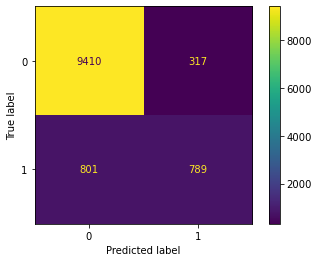

In [154]:
plot_confusion_matrix(estimator=rfc, y_true=yval, X = xval)

# XGBoost

In [116]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
# from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

from bayes_opt import BayesianOptimization
import xgboost as xgb

In [121]:
D_train = xgb.DMatrix(xtrain, label=ytrain, enable_categorical = True)
D_test  = xgb.DMatrix(xtest, label=ytest, enable_categorical = True)
D_val   = xgb.DMatrix(xval, label=yval, enable_categorical = True)

In [122]:
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate, scale_pos_weight, min_child_weight, colsample_bytree):
    params = {'max_depth'       : int(max_depth),
              'gamma'           : gamma,
              'n_estimators'    : int(n_estimators),
              'learning_rate'   : learning_rate,
              'subsample'       : 0.8,
              'eval_metric'     : 'rmse',
              'min_child_weight': min_child_weight,
              'scale_pos_weight': scale_pos_weight,
              'colsample_bytree': colsample_bytree,
              'tree_method'     : 'gpu_hist'}
    cv_result = xgb.cv(params, D_train, num_boost_round=200, nfold=5)
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [123]:
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth' : (3, 15),
                        'gamma' : (0, 2),
                        'learning_rate'    : (0,1),
                        'n_estimators'     : (100,400),
                        'scale_pos_weight' : (5,10),
                        'min_child_weight' : (1,10),
                        'colsample_bytree' : (0,1)} ,verbose=3)

In [124]:
xgb_bo.maximize(n_iter=10, init_points=12, acq='ei')

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | scale_... |
-------------------------------------------------------------------------------------------------------------
[12:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




|  4        | -0.4593   |  0.1253   |  1.883    |  0.686    |  9.308    |  2.832    |  327.4    |  5.142    |
[12:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Paramete

|  8        | -0.4671   |  0.1508   |  1.99     |  0.5574   |  14.64    |  4.971    |  289.7    |  5.421    |
[12:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Paramete

|  12       | -0.5094   |  0.02599  |  1.774    |  0.8893   |  14.31    |  7.468    |  317.6    |  6.956    |
[12:56:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:56:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:56:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Paramete

|  16       | -0.4294   |  0.9961   |  1.595    |  0.7808   |  11.71    |  7.526    |  389.7    |  5.43     |
[12:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Paramete

|  20       | -0.4939   |  0.6699   |  0.7539   |  0.4444   |  11.36    |  9.57     |  392.8    |  7.419    |
[12:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Paramete

In [125]:
params = xgb_bo.max['params']

In [126]:
params

{'colsample_bytree': 0.4071014708135673,
 'gamma': 1.4165153798672587,
 'learning_rate': 0.7496394008344132,
 'max_depth': 11.343644497879644,
 'min_child_weight': 8.858329229687673,
 'n_estimators': 392.35289238033386,
 'scale_pos_weight': 5.569925761532695}

In [130]:
xgb_opt1 = XGBClassifier(**params, use_label_encoder=False, enable_categorical = True).fit(D_train)

TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
xtrain.info()

In [131]:
D_train